In [62]:
import numpy as np
import pandas as pd

import seaborn as sns

import matplotlib.pyplot as plt

from wordcloud import WordCloud

In [63]:
df=pd.read_csv("Tweets.csv")
df

,textID,text,selected_text,sentiment
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative
2,088c60f138,my boss is bullying me...,bullying me,negative
3,9642c003ef,what interview! leave me alone,leave me alone,negative
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative
...,...,...,...,...
27476,4eac33d1c0,wish we could come see u on Denver husband l...,d lost,negative
27477,4f4c4fc327,I`ve wondered about rake to. The client has ...,", don`t force",negative
27478,f67aae2310,Yay good for both of you. Enjoy the break - y...,Yay good for both of you.,positive
27479,ed167662a5,But it was worth it ****.,But it was worth it ****.,positive


In [64]:
df.head()

,textID,text,selected_text,sentiment
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative
2,088c60f138,my boss is bullying me...,bullying me,negative
3,9642c003ef,what interview! leave me alone,leave me alone,negative
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative


In [65]:
df.isnull().sum()

textID           0
text             1
selected_text    1
sentiment        0
dtype: int64

In [69]:
df.columns

Index(['textID', 'text', 'selected_text', 'sentiment'], dtype='object')

In [70]:
print('length of data is', len(df))

length of data is 27481


In [71]:
df.shape

(27481, 4)

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27481 entries, 0 to 27480
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   textID         27481 non-null  object
 1   text           27480 non-null  object
 2   selected_text  27480 non-null  object
 3   sentiment      27481 non-null  object
dtypes: object(4)
memory usage: 858.9+ KB


In [73]:
df.dtypes

textID           object
text             object
selected_text    object
sentiment        object
dtype: object

In [74]:
df['textID'].nunique()

27481

In [75]:
print('TOTAL COUNT OF COLUMN IN DATASET IS:', len(df.columns))
print('TOTAL LENGTH OF DATASET IS:', len(df))

TOTAL COUNT OF COLUMN IN DATASET IS: 4
TOTAL LENGTH OF DATASET IS: 27481


In [76]:
df['textID'].unique()

array(['cb774db0d1', '549e992a42', '088c60f138', ..., 'f67aae2310',
       'ed167662a5', '6f7127d9d7'], dtype=object)

In [77]:
df.isnull().sum()

textID           0
text             1
selected_text    1
sentiment        0
dtype: int64

In [78]:
df = df[['textID','text','selected_text','sentiment']]
df.head()

,textID,text,selected_text,sentiment
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative
2,088c60f138,my boss is bullying me...,bullying me,negative
3,9642c003ef,what interview! leave me alone,leave me alone,negative
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative


<AxesSubplot:xlabel='sentiment', ylabel='count'>

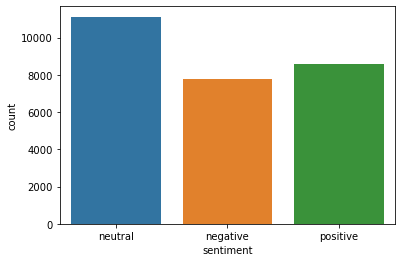

In [79]:
sns.countplot(x=df["sentiment"])

In [80]:
df['text'].mode()

0                          \tREALLY?? oh.. sorry yall  lol
1                                _beckett Thanks so much !
2              You`ll be missed!!  Bring me back  a key...
3                       get lit  I am  http://bit.ly/OASQR
4             Good morning to you !  Its so pretty outs...
                               ...                        
27475    zoombezi bay was soooo fun!! buuuut my legs ar...
27476    {cont} that right their is why fake btches sho...
27477    ~ Happy Star Wars Day.every one ~  ...may the ...
27478    ï¿½anisalovesu me too. I am so so upset,especi...
27479    ï¿½ï¿½h. iï¿½m gonna go in the 'big' house now...
Length: 27480, dtype: object

In [81]:
df['text'].fillna("Good morning to you !  Its so pretty outs...",inplace=True)


In [82]:
df['selected_text'].mode()

0    good
dtype: object

In [83]:
df['selected_text'].fillna(df['selected_text'].mode(),inplace=True)

In [84]:
df.isnull().sum()

textID           0
text             0
selected_text    1
sentiment        0
dtype: int64

In [85]:
df['text'].head(10)

0                  I`d have responded, if I were going
1        Sooo SAD I will miss you here in San Diego!!!
2                            my boss is bullying me...
3                       what interview! leave me alone
4     Sons of ****, why couldn`t they put them on t...
5    http://www.dothebouncy.com/smf - some shameles...
6    2am feedings for the baby are fun when he is a...
7                                           Soooo high
8                                          Both of you
9     Journey!? Wow... u just became cooler.  hehe....
Name: text, dtype: object

In [86]:
positive=df[df['sentiment']=='positive']
wc=WordCloud(max_font_size=50, max_words=100, background_color="white").generate(str(positive['text']))
plt.figure(figsize=(10,10))
plt.imshow(wc)
plt.axis("off")
plt.show()

ValueError: Only supported for TrueType fonts

In [87]:
negative=df[df['sentiment']=='negative']
wc=WordCloud(max_font_size=50, max_words=100, background_color="white").generate(str(negative['text']))
plt.figure(figsize=(10,10))
plt.imshow(wc)
plt.axis("off")
plt.show()

ValueError: Only supported for TrueType fonts

In [88]:
neutral=df[df['sentiment']== 'neutral']
wc=WordCloud(max_font_size=50, max_words=100, background_color="white").generate(str(neutral['text']))
plt.figure(figsize(10,10))
plt.imshow(wc)
plt.axis("off")
plt.show

ValueError: Only supported for TrueType fonts

In [89]:
df['sentiment'].value_counts()

neutral     11118
positive     8582
negative     7781
Name: sentiment, dtype: int64

In [90]:
df.describe()

,textID,text,selected_text,sentiment
count,27481,27481,27480,27481
unique,27481,27481,22463,3
top,cb774db0d1,"I`d have responded, if I were going",good,neutral
freq,1,1,199,11118


In [91]:
df[10:11]


,textID,text,selected_text,sentiment
10,2339a9b08b,"as much as i love to be hopeful, i reckon the...","as much as i love to be hopeful, i reckon the ...",neutral


In [92]:
df.isna().sum()

textID           0
text             0
selected_text    1
sentiment        0
dtype: int64

In [93]:
df['selected_text'].mode()

0    good
dtype: object

In [94]:
df['selected_text'].fillna('good',inplace=True)

In [95]:
df.isna().sum()

textID           0
text             0
selected_text    0
sentiment        0
dtype: int64

In [96]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sid = SentimentIntensityAnalyzer()
words = set(nltk.corpus.words())

TypeError: 'LazyCorpusLoader' object is not callable

In [97]:
sentence = df2['tweet'][0]
sid.polarity_scores(sentence)['compound']

NameError: name 'df2' is not defined

In [98]:
data =input('Enter Tweet:')
p=sid.polarity_scores(data)['compound']
if(p>0):
    print('positive')
elif(p == 0):
    print('neutral')
else:
    print('negative')

Enter Tweet:hellooooo
neutral
